In [1]:
import pandas as pd

In [16]:
df = pd.read_csv('olist_data/olist_order_reviews_dataset.csv')
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [18]:
df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [22]:
print(df.columns)

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


In [43]:
# Estatísticas descritivas
print(df.describe())

       review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns 

C:\Users\bruna\AppData\Local\Temp\ipykernel_20820\69493909.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='review_score', palette='viridis', ax=ax)


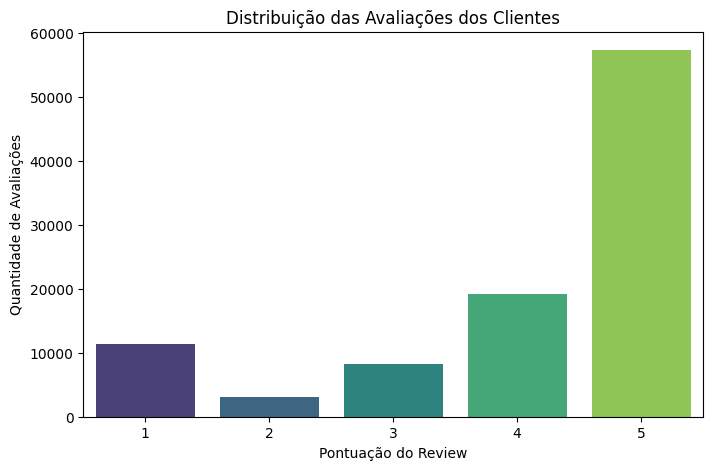

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma nova figura e definir o tamanho
fig, ax = plt.subplots(figsize=(8,5))

# Criar o gráfico da distribuição das notas dadas pelos clientes
sns.countplot(data=df, x='review_score', palette='viridis', ax=ax)

# Adicionar rótulos e título
ax.set_xlabel("Pontuação do Review")
ax.set_ylabel("Quantidade de Avaliações")
ax.set_title("Distribuição das Avaliações dos Clientes")

# Mostrar o gráfico
plt.show()

In [25]:
#tratar os dados para análise de sentimentos
#verificar se há valores ausentes
df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [26]:
df['review_comment_title'] = df['review_comment_title'].fillna("Sem título")

In [27]:
df['review_comment_message'] = df['review_comment_message'].fillna("Sem comentário")

In [ ]:
#garantir que não há valores ausentes na análise
print(df.isnull().sum())

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


In [ ]:
#remover duplicatas
df = df.drop_duplicates()

In [ ]:
import nltk

nltk.download

In [37]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bruna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bruna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
import nltk
print(nltk.data.path)

['C:\\Users\\bruna/nltk_data', 'c:\\Users\\bruna\\OneDrive\\Desktop\\projeto_olist\\venv\\nltk_data', 'c:\\Users\\bruna\\OneDrive\\Desktop\\projeto_olist\\venv\\share\\nltk_data', 'c:\\Users\\bruna\\OneDrive\\Desktop\\projeto_olist\\venv\\lib\\nltk_data', 'C:\\Users\\bruna\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [44]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words("portuguese"))

def limpar_texto(texto):
    texto = texto.lower()  # Converter para minúsculas
    texto = re.sub(r"\d+", "", texto)  # Remover números
    texto = re.sub(r"[^\w\s]", "", texto)  # Remover pontuação
    palavras = texto.split()
    palavras = [palavra for palavra in palavras if palavra not in stop_words]  # Remover stopwords
    return " ".join(palavras)

df["review_comment_message"] = df["review_comment_message"].fillna("").apply(limpar_texto)

print(df["review_comment_message"].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bruna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                           comentário
1                                           comentário
2                                           comentário
3                    recebi bem antes prazo estipulado
4    parabéns lojas lannister adorei comprar intern...
Name: review_comment_message, dtype: object


In [45]:
def definir_sentimento(score):
    if score >= 4:
        return "positivo"
    elif score == 3:
        return "neutro"
    else:
        return "negativo"

df["sentiment"] = df["review_score"].apply(definir_sentimento)
print(df["sentiment"].value_counts())


sentiment
positivo    76470
negativo    14575
neutro       8179
Name: count, dtype: int64


In [51]:
import sklearn

In [ ]:
#vetorização do texto
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["review_comment_message"])
y = df["sentiment"]


In [53]:
#dividir os dados
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
#treinar um modelo de regressão logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Acurácia: 0.8468631897203326
              precision    recall  f1-score   support

    negativo       0.75      0.63      0.69      3003
      neutro       0.35      0.02      0.05      1645
    positivo       0.86      0.98      0.92     15197

    accuracy                           0.85     19845
   macro avg       0.66      0.54      0.55     19845
weighted avg       0.80      0.85      0.81     19845



c:\Users\bruna\OneDrive\Desktop\projeto_olist\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Carregar os dados
df = pd.read_csv("olist_order_reviews_dataset.csv")

# Definir X e y
X = df["review_comment_message"].fillna("")  # Preenche valores nulos com string vazia
y = df["review_score"].apply(lambda x: "positivo" if x >= 4 else ("neutro" if x == 3 else "negativo"))

# Transformar texto em números com TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Dividir os dados em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

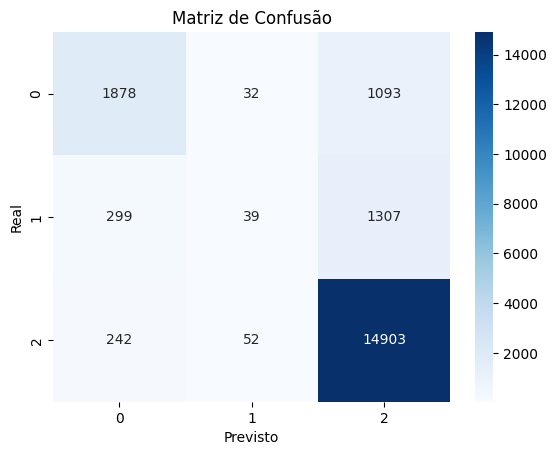

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negativo       0.78      0.63      0.69      3003
      neutro       0.32      0.02      0.04      1645
    positivo       0.86      0.98      0.92     15197

    accuracy                           0.85     19845
   macro avg       0.65      0.54      0.55     19845
weighted avg       0.80      0.85      0.81     19845



In [20]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acc:.2%}")

Acurácia: 84.76%


In [21]:
# Identificar avaliações neutras que foram mal classificadas
neutro_real = y_test[y_test == "neutro"]
predicoes_erradas = y_pred[y_test == "neutro"]

# Exibir algumas avaliações neutras com predições erradas
for i in range(10):  # Exibe as 10 primeiras
    print(f"Texto: {X_test[i]}")
    print(f"Predição: {predicoes_erradas[i]}")
    print(f"Real: {neutro_real.iloc[i]}")
    print("-" * 50)


Texto: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 0 stored elements and shape (1, 15688)>
Predição: negativo
Real: neutro
--------------------------------------------------
Texto: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (1, 15688)>
  Coords	Values
  (0, 4270)	0.6450796812667765
  (0, 790)	0.764115308586835
Predição: positivo
Real: neutro
--------------------------------------------------
Texto: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 0 stored elements and shape (1, 15688)>
Predição: positivo
Real: neutro
--------------------------------------------------
Texto: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 0 stored elements and shape (1, 15688)>
Predição: positivo
Real: neutro
--------------------------------------------------
Texto: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 0 stored elements and shape (1, 15688)>
Predição: positivo
Real: neutro
---------------